<a href="https://colab.research.google.com/github/passt0r/LDSSProject/blob/master/SSProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow
import sklearn
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
url = "/content/drive/My Drive/project_files/preparedTrain.csv"
trainDF = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
url = "/content/drive/My Drive/project_files/preparedTest.csv"
testDF = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Create propper dataset

In [0]:
trainDF.head()

,Unnamed: 0,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,CET,GEN,TBM,TMP,CIP,ENA.Accession.Number,trainName,testName,Unnamed: 0.1,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,modB,pgl,glnQ,ydjM,osmE,rcsF,fruB,rsuA,yfcA,ypfN,pdxJ,...,group_47691,group_47700,group_47733,group_47774,group_47784,group_47794,group_47813,group_47844,group_47929,group_47938,ylbB_2,group_48124,group_48152,group_48197,group_48200,group_48201,group_48202,group_48203,group_48392,group_48535,group_48536,group_48538,group_48540,group_48600,group_48601,group_48618,group_48621,group_48631,group_48654,group_48690,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,1,11657_5#11,2010.0,S,S,R,NaN,R,S,S,S,S,S,R,R,ERS356935,ERS356935,NaN,11657_5#11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,11657_5#12,2010.0,S,S,S,NaN,S,S,S,S,S,S,S,S,ERS356938,ERS356938,NaN,11657_5#12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,11657_5#13,2010.0,S,S,R,NaN,R,S,S,S,S,S,S,R,ERS356941,ERS356941,NaN,11657_5#13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,11657_5#14,2010.0,S,S,R,NaN,S,S,S,S,S,S,R,S,ERS356967,ERS356967,NaN,11657_5#14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,11657_5#15,2011.0,S,S,S,NaN,S,S,S,S,S,S,S,S,ERS356984,ERS356984,NaN,11657_5#15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
trainDF = trainDF.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'testName', 'CTZ', 'CTX', 'AMP', 'TZP', 'CXM', 'CET', 'GEN', 'TBM', 'TMP', 'CIP'])
testDF = testDF.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'testName', 'CTZ', 'CTX', 'AMP', 'TZP', 'CXM', 'CET', 'GEN', 'TBM', 'TMP', 'CIP'])

In [0]:
trainDF.head()

,Isolate,Year,AMX,AMC,ENA.Accession.Number,trainName,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,modB,pgl,glnQ,ydjM,osmE,rcsF,fruB,rsuA,yfcA,ypfN,pdxJ,plsX,ycfF,minD,marC_2,sugE,psd,nsrR,rnfA,kbl,greB,mgsA,mukE,dtd,...,group_47691,group_47700,group_47733,group_47774,group_47784,group_47794,group_47813,group_47844,group_47929,group_47938,ylbB_2,group_48124,group_48152,group_48197,group_48200,group_48201,group_48202,group_48203,group_48392,group_48535,group_48536,group_48538,group_48540,group_48600,group_48601,group_48618,group_48621,group_48631,group_48654,group_48690,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,11657_5#11,2010.0,NaN,R,ERS356935,ERS356935,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11657_5#12,2010.0,NaN,S,ERS356938,ERS356938,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11657_5#13,2010.0,NaN,R,ERS356941,ERS356941,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11657_5#14,2010.0,NaN,S,ERS356967,ERS356967,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11657_5#15,2011.0,NaN,S,ERS356984,ERS356984,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
amx_tr_df = trainDF[trainDF.AMX.notnull()]
amc_tr_df = trainDF[trainDF.AMC.notnull()]
amx_tr_df = amx_tr_df.drop(columns = ['AMC'])
amc_tr_df = amc_tr_df.drop(columns = ['AMX'])

In [0]:
amx_ts_df = testDF[testDF.AMX.notnull()]
amc_ts_df = testDF[testDF.AMC.notnull()]
amx_ts_df = amx_ts_df.drop(columns = ['AMC'])
amc_ts_df = amc_ts_df.drop(columns = ['AMX'])

In [0]:
amx_tr_df = amx_tr_df.replace({'AMX': {'R': 1, 'S': 0}})
amc_tr_df = amc_tr_df.replace({'AMC': {'R': 1, 'S': 0}})

In [0]:
amx_ts_df = amx_ts_df.replace({'AMX': {'R': 1, 'S': 0}})
amc_ts_df = amc_ts_df.replace({'AMC': {'R': 1, 'S': 0}})

In [0]:
amx_tr_df.head()

,Isolate,Year,AMX,ENA.Accession.Number,trainName,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,modB,pgl,glnQ,ydjM,osmE,rcsF,fruB,rsuA,yfcA,ypfN,pdxJ,plsX,ycfF,minD,marC_2,sugE,psd,nsrR,rnfA,kbl,greB,mgsA,mukE,dtd,cpxP,...,group_47691,group_47700,group_47733,group_47774,group_47784,group_47794,group_47813,group_47844,group_47929,group_47938,ylbB_2,group_48124,group_48152,group_48197,group_48200,group_48201,group_48202,group_48203,group_48392,group_48535,group_48536,group_48538,group_48540,group_48600,group_48601,group_48618,group_48621,group_48631,group_48654,group_48690,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
11,11657_5#25,2001.0,1,ERS357184,ERS357184,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,11657_5#26,2001.0,0,ERS357187,ERS357187,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,11657_5#27,2001.0,1,ERS357200,ERS357200,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,11657_5#30,2001.0,1,ERS357222,ERS357222,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,11657_5#32,2002.0,1,ERS357247,ERS357247,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Import XGBoost

In [0]:
from sklearn.datasets import load_boston

In [0]:
!pip install xgboost
#!pip install --upgrade

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error

# Import split data library and actually split data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
amx_X_train, amx_X_test, amx_y_train, amx_y_test = train_test_split(amx_tr_df.drop(columns = ['AMX']), amx_tr_df['AMX'], test_size=0.2)
#amx_X_train, amx_X_test, amx_y_train, amx_y_test = train_test_split(amx_tr_df[amx_tr_df.columns.difference(['Isolate', 'Year', 'ENA.Accession.Number', 'trainName'])], amx_tr_df['AMX'], test_size=0.2)

In [0]:
amc_X_train, amc_X_test, amc_y_train, amc_y_test = train_test_split(amc_tr_df.drop(columns = ['AMC']), amc_tr_df['AMC'], test_size=0.2)
#amc_X_train, amc_X_test, amc_y_train, amc_y_test = train_test_split(amc_tr_df[amc_tr_df.columns.difference(['Isolate', 'Year', 'ENA.Accession.Number', 'trainName'])], amc_tr_df['AMC'], test_size=0.2)

In [0]:
amx_X_train.head()

,Isolate,Year,ENA.Accession.Number,trainName,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,modB,pgl,glnQ,ydjM,osmE,rcsF,fruB,rsuA,yfcA,ypfN,pdxJ,plsX,ycfF,minD,marC_2,sugE,psd,nsrR,rnfA,kbl,greB,mgsA,mukE,dtd,cpxP,fbp,...,group_47691,group_47700,group_47733,group_47774,group_47784,group_47794,group_47813,group_47844,group_47929,group_47938,ylbB_2,group_48124,group_48152,group_48197,group_48200,group_48201,group_48202,group_48203,group_48392,group_48535,group_48536,group_48538,group_48540,group_48600,group_48601,group_48618,group_48621,group_48631,group_48654,group_48690,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
824,11679_6#31,2003.0,ERS357359,ERS357359,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956,11679_7#94,2011.0,ERS358251,ERS358251,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,11679_8#19,2002.0,ERS357283,ERS357283,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1008,11679_8#68,2006.0,ERS357828,ERS357828,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1013,11679_8#72,2009.0,ERS357921,ERS357921,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
amx_X_train.dtypes

Isolate                  object
Year                    float64
ENA.Accession.Number     object
trainName                object
yeiU                      int64
yhhS                      int64
ybaE                      int64
eutR                      int64
ibrB                      int64
ytfP                      int64
aslB                      int64
narQ                      int64
tolR                      int64
galM                      int64
modB                      int64
pgl                       int64
glnQ                      int64
ydjM                      int64
osmE                      int64
rcsF                      int64
fruB                      int64
rsuA                      int64
yfcA                      int64
ypfN                      int64
pdxJ                      int64
plsX                      int64
ycfF                      int64
minD                      int64
marC_2                    int64
sugE                      int64
                         ...   
ylbB_2  

In [0]:
amc_X_train.dtypes

Isolate                  object
Year                    float64
ENA.Accession.Number     object
trainName                object
yeiU                      int64
yhhS                      int64
ybaE                      int64
eutR                      int64
ibrB                      int64
ytfP                      int64
aslB                      int64
narQ                      int64
tolR                      int64
galM                      int64
modB                      int64
pgl                       int64
glnQ                      int64
ydjM                      int64
osmE                      int64
rcsF                      int64
fruB                      int64
rsuA                      int64
yfcA                      int64
ypfN                      int64
pdxJ                      int64
plsX                      int64
ycfF                      int64
minD                      int64
marC_2                    int64
sugE                      int64
                         ...   
ylbB_2  

In [0]:
amx_data_train_dmatrix = xgb.DMatrix(data=amx_X_train.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']),label=amx_y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
amc_data_train_dmatrix = xgb.DMatrix(data=amc_X_train.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']) ,label=amc_y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
params = {"objective":'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10, 'n_estimators' : 20}

In [0]:
#xg_class_amx = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 20)
xg_class_amx = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 20, seed = 30)

In [0]:
#xg_class_amc = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 20)
xg_class_amc = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 20, seed = 30)

In [0]:
xg_class_amc.fit(amc_X_train.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']),amc_y_train)

preds_amc = xg_class_amc.predict(amc_X_test.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']))

In [0]:
xg_class_amx.fit(amx_X_train.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']),amx_y_train)

preds_amx = xg_class_amx.predict(amx_X_test.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']))

In [0]:
rmse_amx = np.sqrt(mean_squared_error(amx_y_test, preds_amx))
print("RMSE for amx: %f" % (rmse_amx))

RMSE for amx: 0.330447


In [0]:
rmse_amc = np.sqrt(mean_squared_error(amc_y_test, preds_amc))
print("RMSE for amc: %f" % (rmse_amc))

RMSE for amc: 0.472280


In [0]:
from sklearn.metrics import (
    precision_score, recall_score,
    average_precision_score,
    f1_score,
    roc_auc_score,
)

In [0]:
print("Scores for AMC:")
print(precision_score(amc_y_test, preds_amc))
print(recall_score(amc_y_test, preds_amc))
print(f1_score(amc_y_test, preds_amc))
print(roc_auc_score(amc_y_test, preds_amc))
print("---")

Scores for AMC:
0.75
0.5217391304347826
0.6153846153846153
0.715671825104397
---


In [0]:
train_score_amc = xg_class_amc.score(amc_X_train.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']), amc_y_train)
test_score_amc = xg_class_amc.score(amc_X_test.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']), amc_y_test)
print(train_score_amc, test_score_amc)

0.8947858472998138 0.7769516728624535


In [0]:
print("Scores for AMX:")
print(precision_score(amx_y_test, preds_amx))
print(recall_score(amx_y_test, preds_amx))
print(f1_score(amx_y_test, preds_amx))
print(roc_auc_score(amx_y_test, preds_amx))
print("---")

Scores for AMX:
0.9175257731958762
0.89
0.9035532994923858
0.8909459459459459
---


In [0]:
train_score_amx = xg_class_amx.score(amx_X_train.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']), amx_y_train)
test_score_amx = xg_class_amx.score(amx_X_test.drop(columns = ['Isolate', 'Year', 'ENA.Accession.Number', 'trainName']), amx_y_test)
print(train_score_amx, test_score_amx)

0.939568345323741 0.8908045977011494


# Cross validation

In [0]:
amx_cv_result = xgb.cv(dtrain=amx_data_train_dmatrix, params=params, nfold=4, num_boost_round=50,early_stopping_rounds=10,metrics="error", as_pandas=True, seed=80)
amc_cv_result = xgb.cv(dtrain=amc_data_train_dmatrix, params=params, nfold=4, num_boost_round=50,early_stopping_rounds=10,metrics="error", as_pandas=True, seed=80)

In [0]:
amx_cv_result.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.159231,0.002605,0.188468,0.014601
1,0.115123,0.026261,0.146718,0.023650
2,0.091128,0.009650,0.123746,0.028612
3,0.093050,0.005739,0.126603,0.025629
4,0.096406,0.007267,0.129501,0.022470


In [0]:
amc_cv_result.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.210120,0.010610,0.246768,0.016507
1,0.200191,0.011212,0.243956,0.007918
2,0.198640,0.010822,0.240228,0.003499
3,0.196776,0.007677,0.237436,0.005748
4,0.194292,0.008935,0.228125,0.007331


# Visualize features importance

In [0]:
amx_xg_cl = xgb.train(params=params, dtrain=amx_data_train_dmatrix, num_boost_round=10)
amc_xg_cl = xgb.train(params=params, dtrain=amc_data_train_dmatrix, num_boost_round=10)

In [0]:
import matplotlib.pyplot as plt

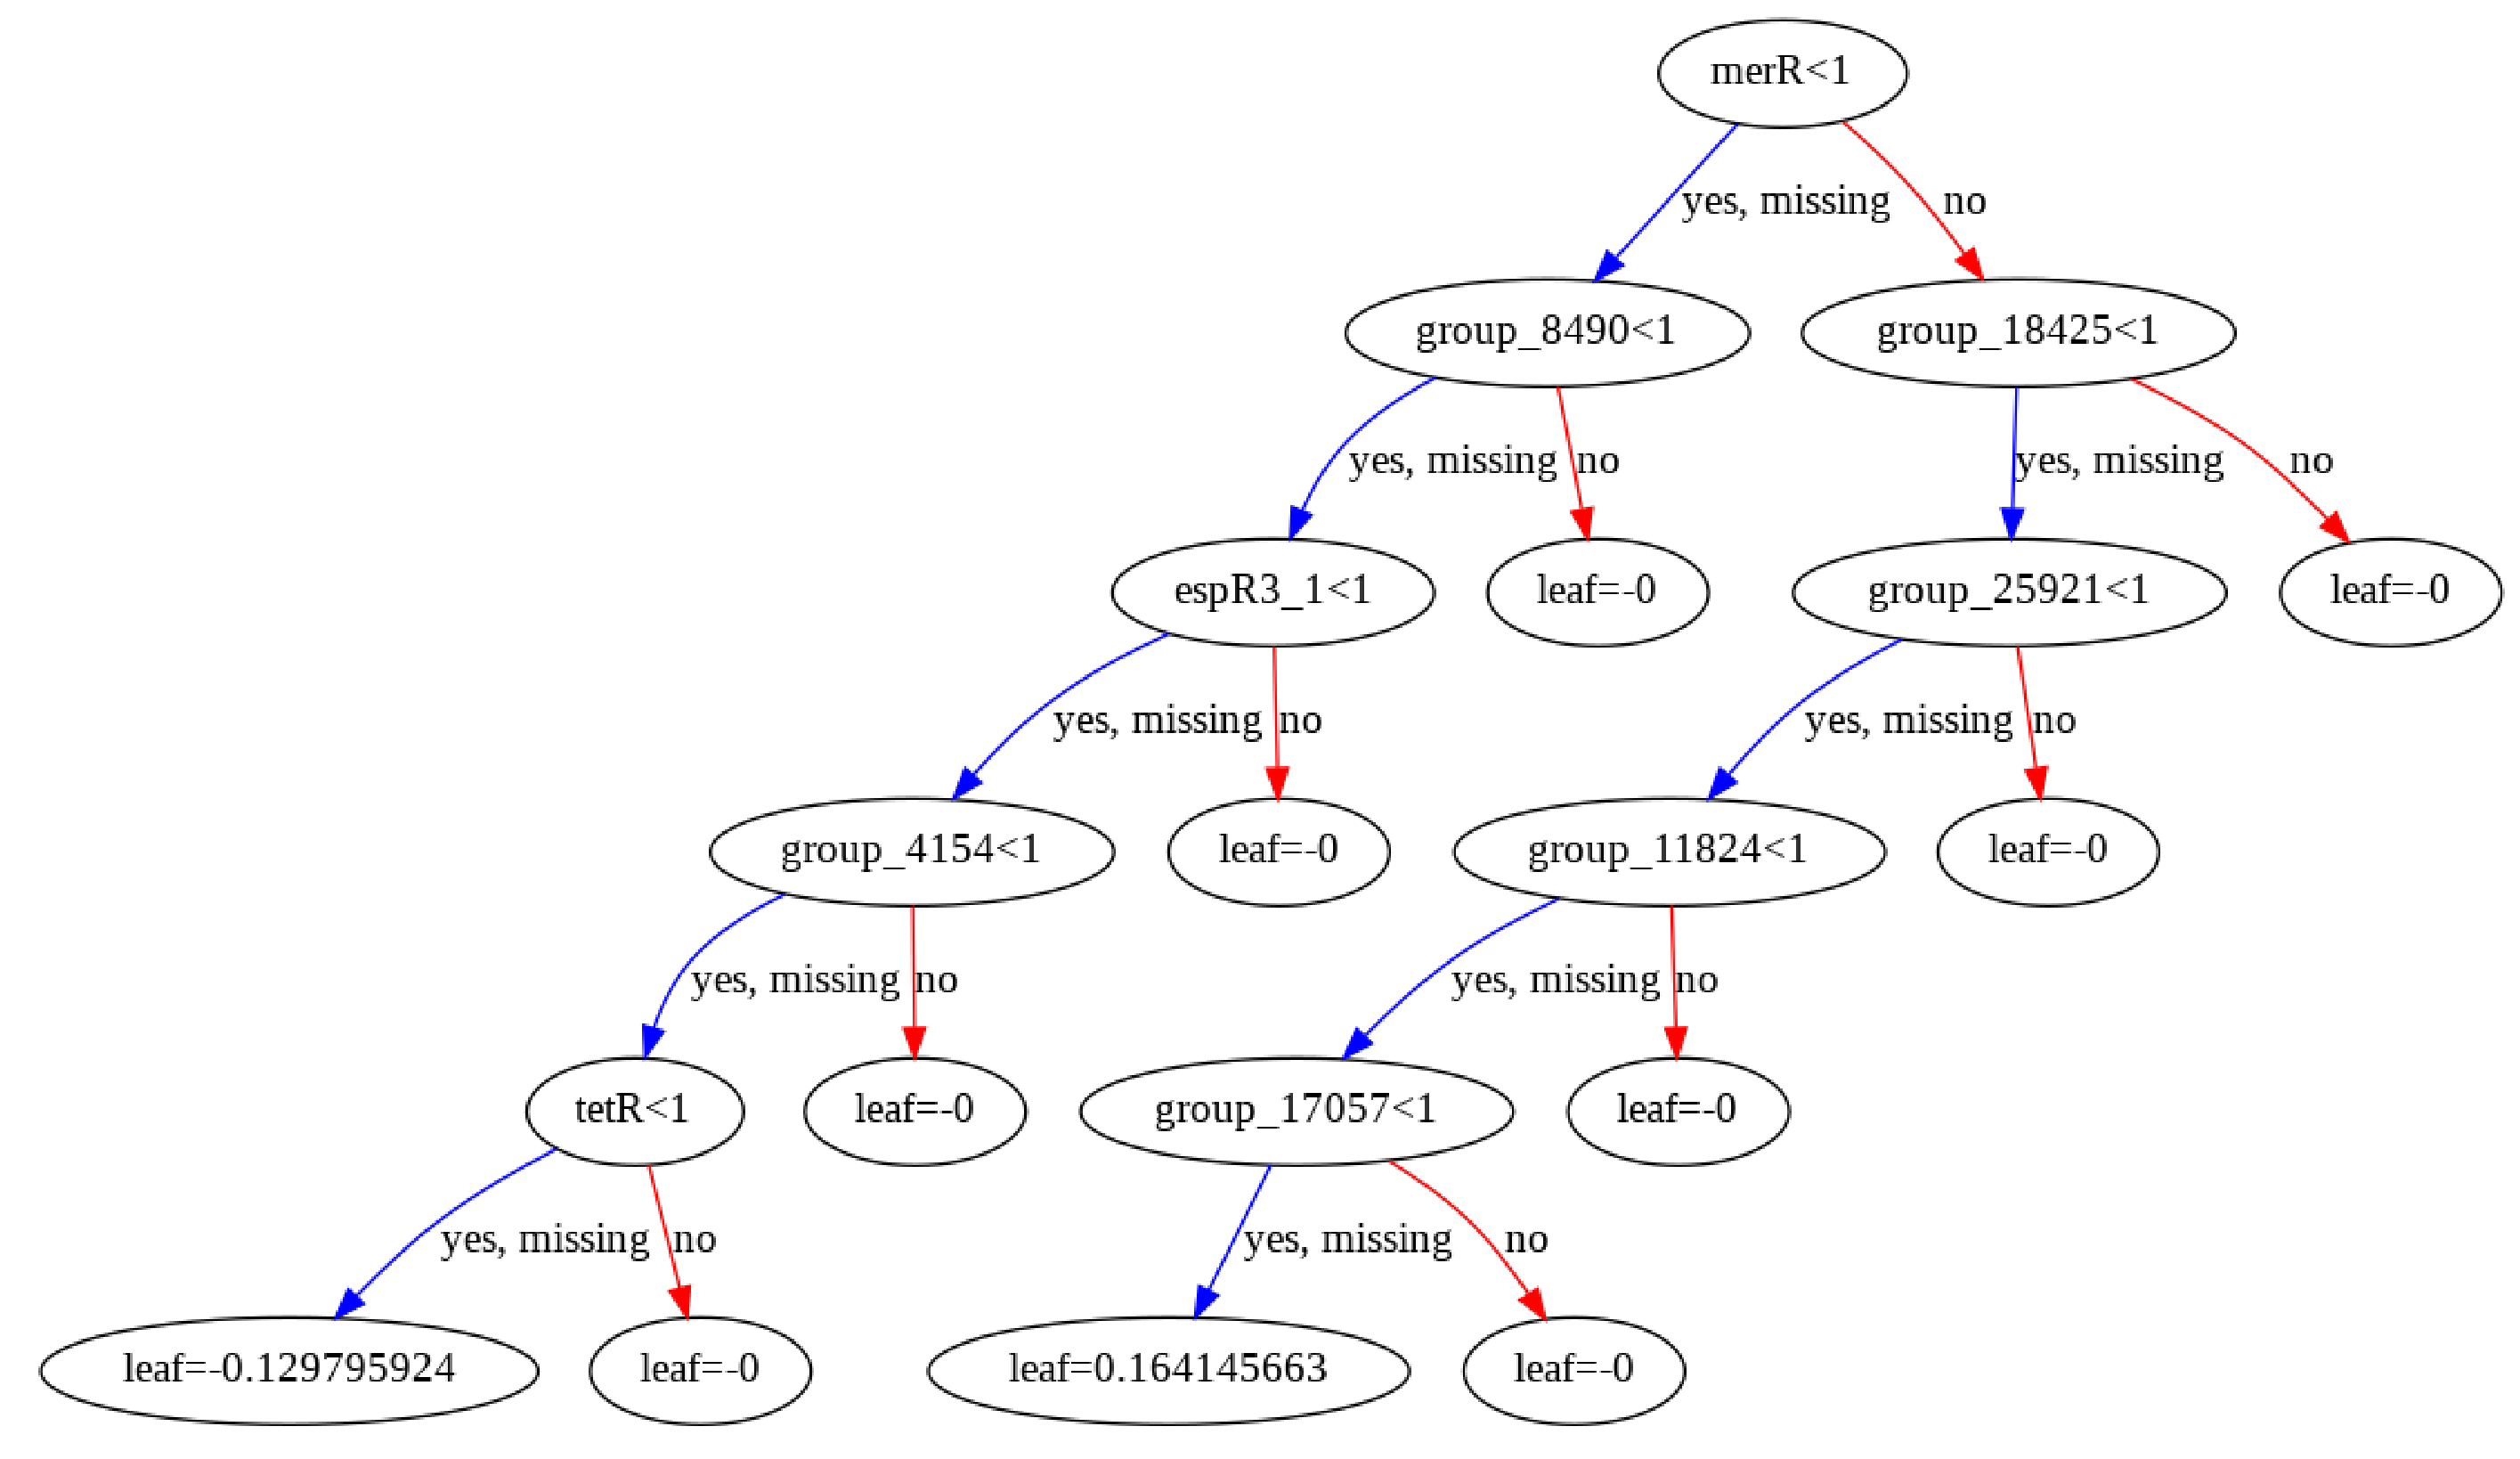

In [0]:
xgb.plot_tree(amx_xg_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.savefig('amx_1.pdf')

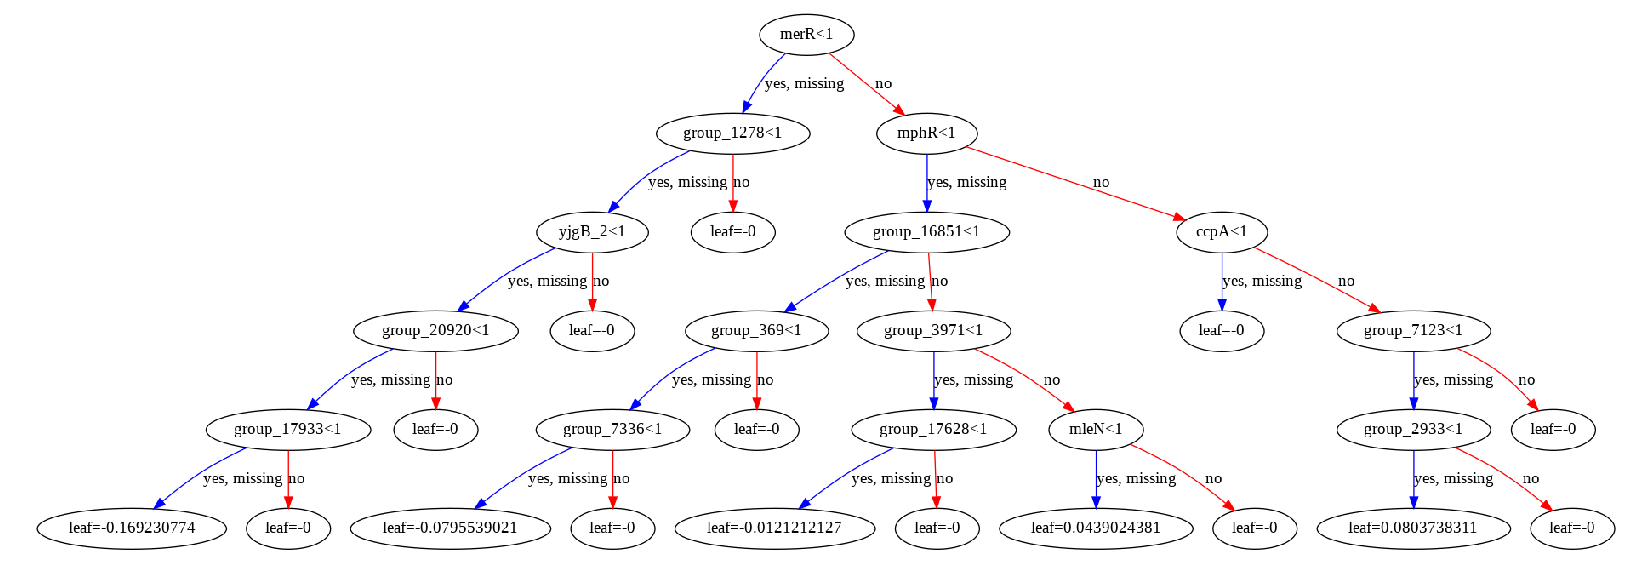

In [0]:
xgb.plot_tree(amc_xg_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.savefig('amc_1.pdf')

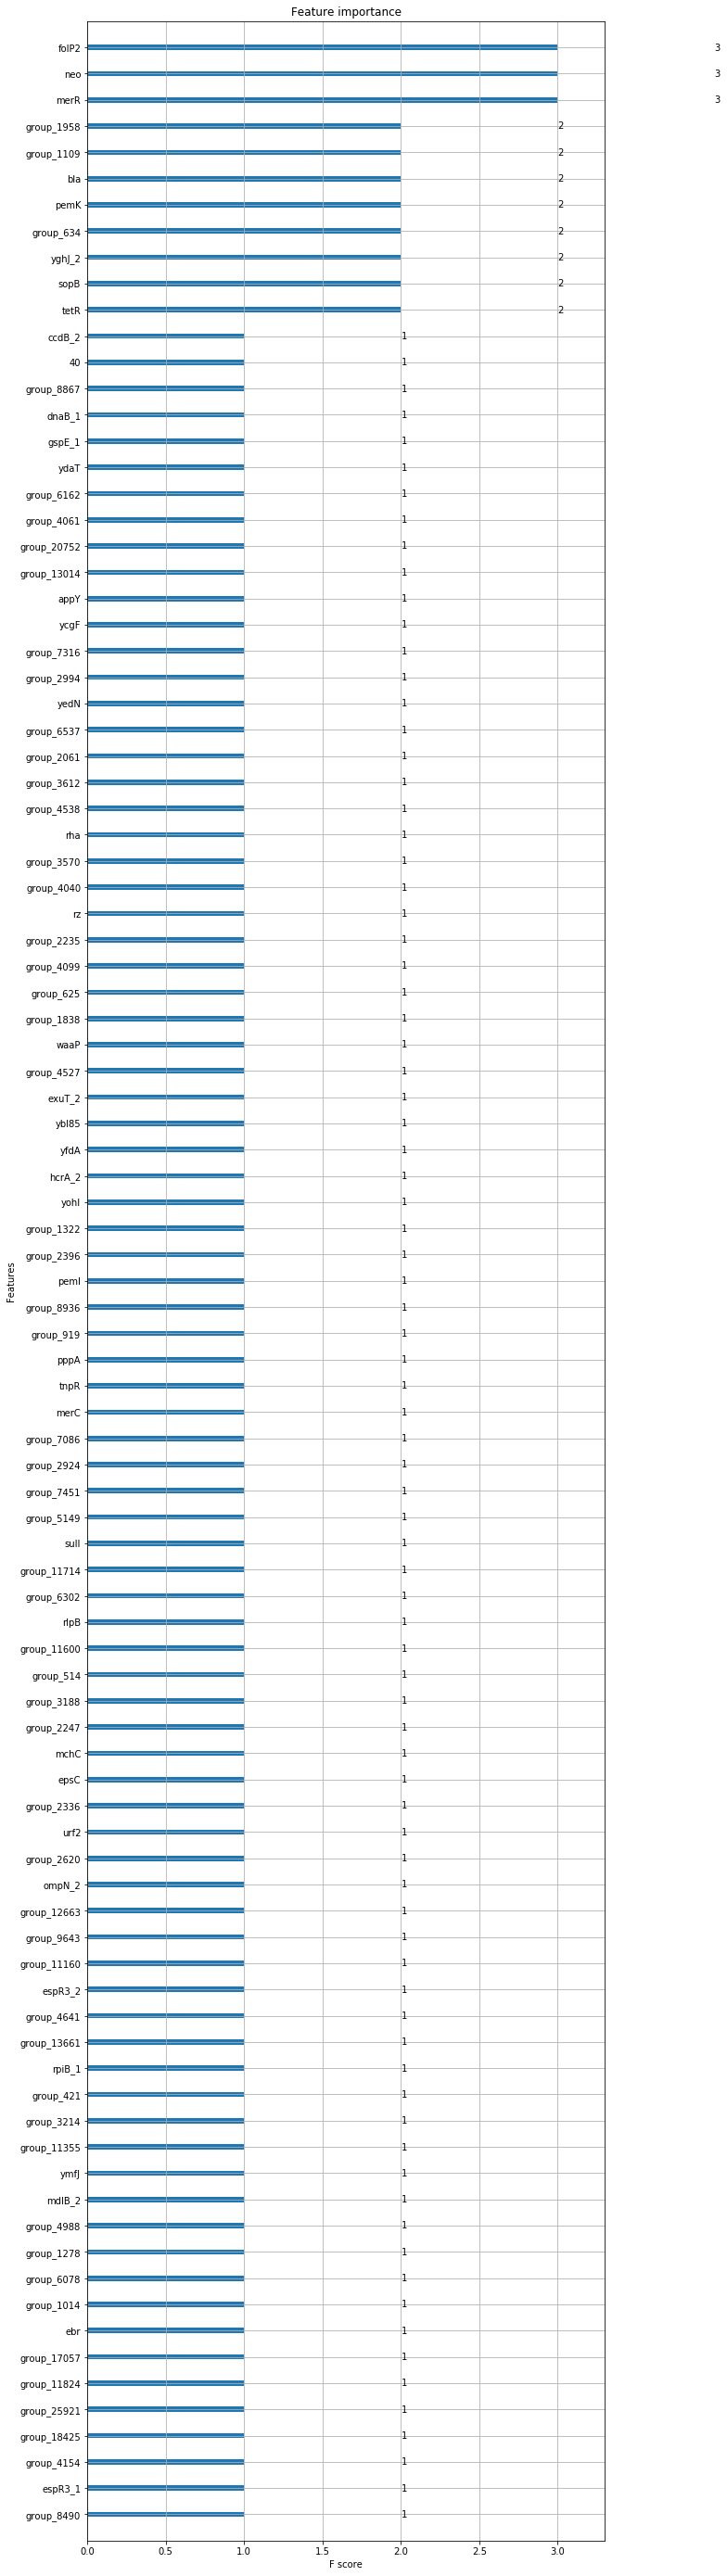

In [0]:
xgb.plot_importance(amx_xg_cl)
plt.rcParams['figure.figsize'] = [5, 50]
plt.savefig('amx_2.pdf')

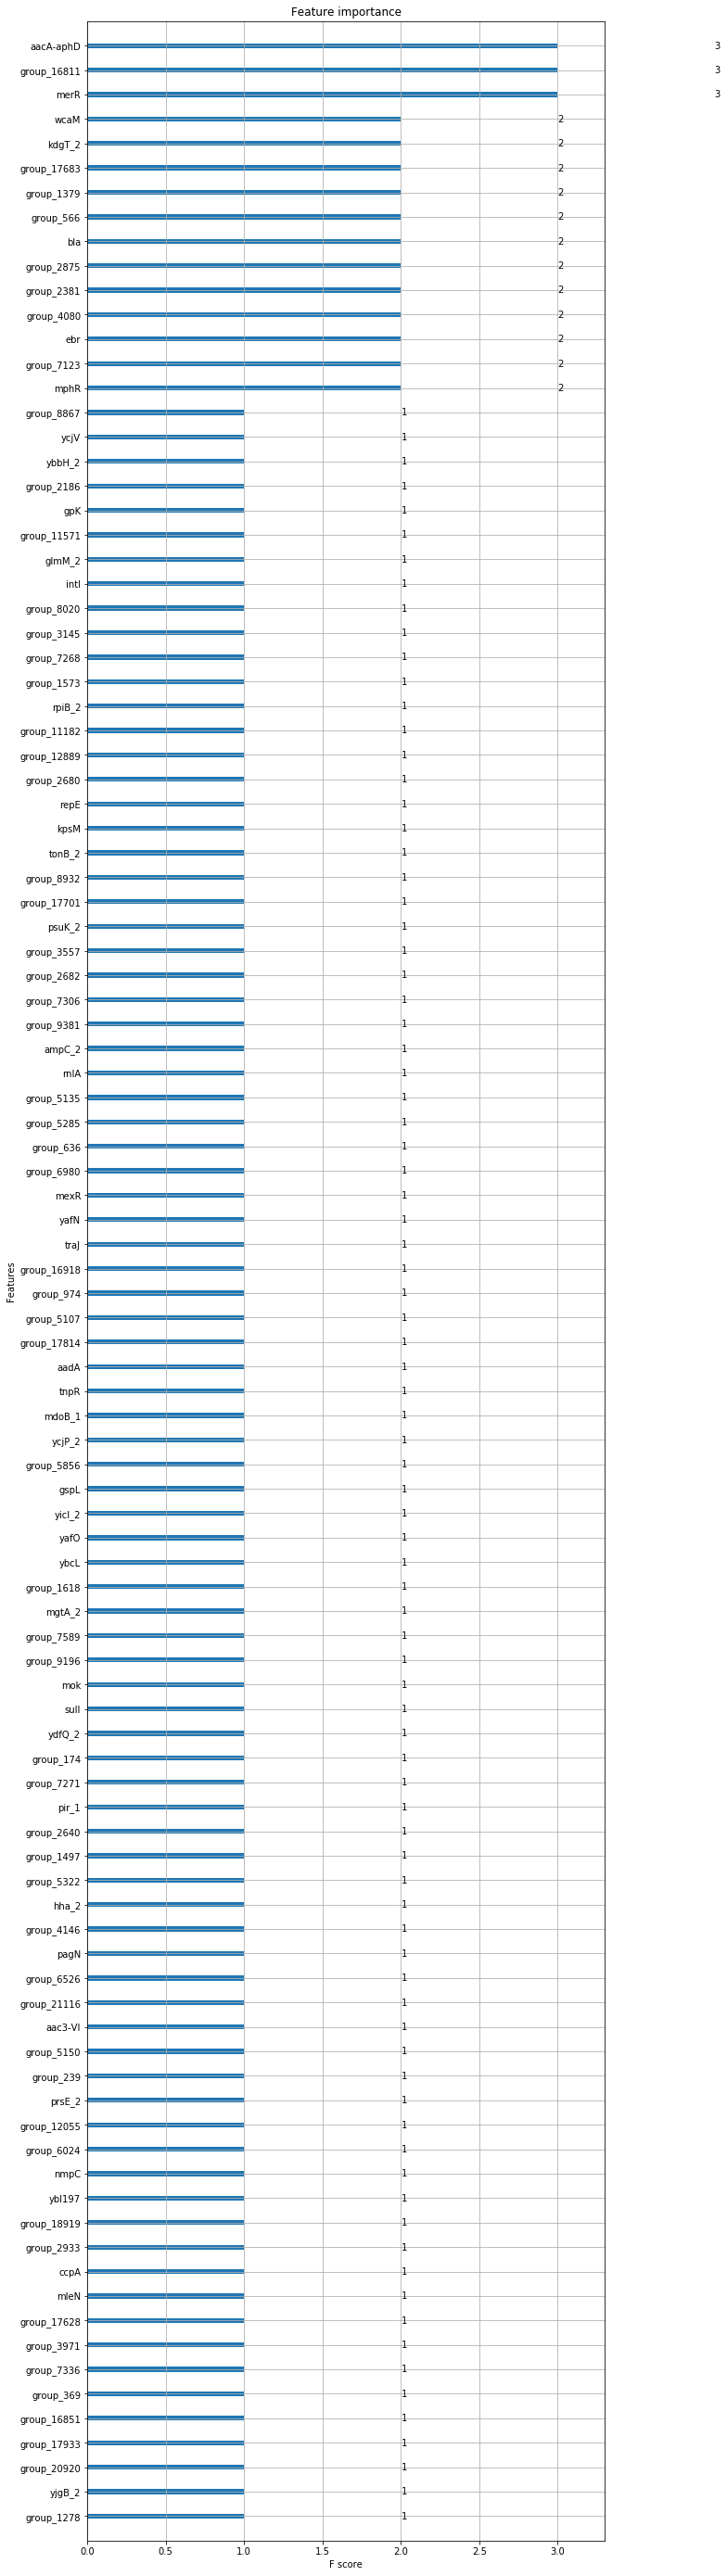

In [0]:
xgb.plot_importance(amc_xg_cl)
plt.rcParams['figure.figsize'] = [10, 50]
plt.savefig('amc_2.pdf')


In [0]:
!ls

amc_1.pdf  amc_2.pdf  amx_1.pdf  amx_2.pdf  drive  sample_data


# Use TPOT to optimize the actual data